In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the Datasets

In [2]:
order_details = pd.read_csv(r"C:\Users\DELL\Documents\10k Jupyter Notebooks\order_details.csv")

orders = pd.read_csv(r"C:\Users\DELL\Documents\10k Jupyter Notebooks\orders.csv")

pizzas = pd.read_csv(r"C:\Users\DELL\Documents\10k Jupyter Notebooks\pizzas.csv")

pizza_types = pd.read_csv(r"C:\Users\DELL\Documents\10k Jupyter Notebooks\pizza_types.csv", encoding='latin1') #used 'latin' encoding to handle special characters

# Joining the Datasets

In [3]:
#joining order_details with orders on 'order_id'

merged_df = order_details.merge(orders, on='order_id', how='left')

In [4]:
#joining the result with pizzas on 'pizza_id'

merged_df = merged_df.merge(pizzas, on='pizza_id', how='left')

In [5]:
#joining pizza_types on 'pizza_type_id'

final_df = merged_df.merge(pizza_types, on='pizza_type_id', how='left')

In [6]:
final_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


# Checking of Errors, null/unknown values and cleaning of the Dataframe

In [7]:
#Strip spaces from column names

final_df.columns = final_df.columns.str.strip()

In [8]:
final_df.tail()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
48619,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


In [9]:
#check for duplicate

final_df.duplicated().sum()

np.int64(0)

In [10]:
final_df["date"].value_counts()

date
2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: count, Length: 358, dtype: int64

In [11]:
final_df["quantity"].value_counts()

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64

In [12]:
final_df["category"].value_counts()

category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [13]:
final_df["name"].value_counts()

name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza           

In [14]:
final_df["size"].value_counts()

size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [15]:
final_df["price"].value_counts()

price
20.75    8685
12.00    5600
16.00    4474
16.75    4294
16.50    4040
12.50    3328
20.25    3032
12.75    2507
20.50    1998
18.50    1359
17.95    1273
16.25    1114
10.50    1001
12.25     830
9.75      739
15.25     712
14.75     577
11.00     570
25.50     544
23.65     480
13.25     473
14.50     391
17.50     381
21.00     190
35.95      28
Name: count, dtype: int64

In [16]:
final_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


# Creation of helpful columns for analysis

In [17]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['hour'] = pd.to_datetime(final_df['time'], format ='%H:%M:%S').dt.hour
final_df['day_name'] = final_df['date'].dt.day_name()
final_df['month'] = final_df['date'].dt.month_name()

In [18]:
final_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,hour,day_name,month
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",11,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",11,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",11,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",11,Thursday,January
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",11,Thursday,January


In [19]:
final_df.tail()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,hour,day_name,month
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",21,Thursday,December
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",21,Thursday,December
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",21,Thursday,December
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",22,Thursday,December
48619,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",23,Thursday,December


# Analysis

## 1. What is the total revenue/sales?

In [20]:
total_revenue = (final_df['price'] * final_df['quantity']).sum().item()

In [21]:
total_revenue

817860.0499999999

## 2. Find the total quantity sold.

In [22]:
total_quantity_sold = final_df['quantity'].sum().item()

In [23]:
total_quantity_sold

49574

## 3. Find the Total Orders.

In [24]:
total_orders = final_df['order_id'].nunique()

In [25]:
total_orders

21350

## 4. How many pizza types do they sell?

In [26]:
num_pizza_types = final_df['name'].nunique()

In [27]:
num_pizza_types

32

## 5. Find the average price of the pizzas.

In [28]:
avg_price = final_df['price'].mean().item()

In [29]:
avg_price

16.494132044426163

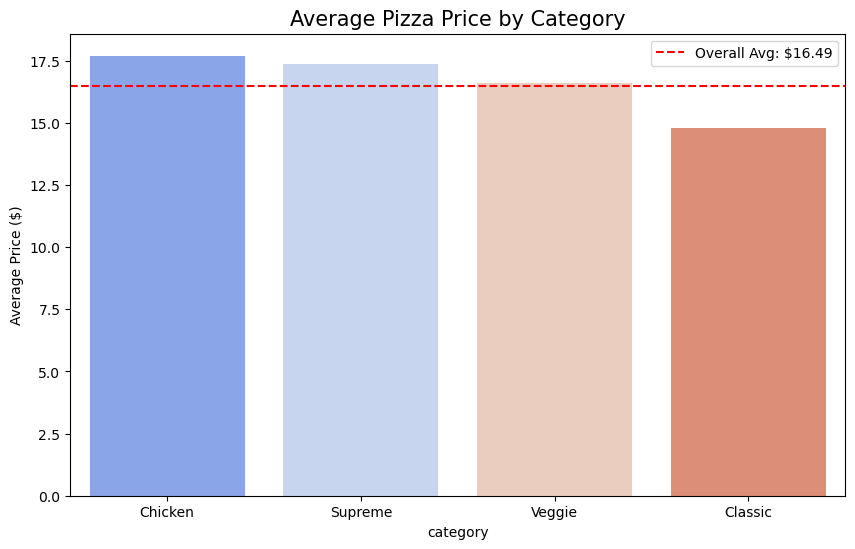

In [30]:
#visualization showing the distribution of pizza prices. 
#the red dashed line represents the average price of $16.49


plt.figure(figsize=(10, 6))
avg_price_by_cat = final_df.groupby('category')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_cat.index, y=avg_price_by_cat.values, palette='coolwarm', legend=False)
plt.axhline(avg_price, color='red', linestyle='--', label=f'Overall Avg: ${avg_price:.2f}')
plt.title('Average Pizza Price by Category', fontsize=15)
plt.ylabel('Average Price ($)')
plt.legend()
plt.show()

#### *The average price across the entire menu is approximately $16.49. The price point positions the business as a mid-range, quality focused establishment.*

## 6. What are the peak hours of sales?

In [31]:
peak_hours = final_df.groupby('hour')['order_id'].nunique().sort_values(ascending=False)

In [32]:
peak_hours

hour
12    2520
13    2455
18    2399
17    2336
19    2009
16    1920
20    1642
14    1472
15    1468
11    1231
21    1198
22     663
23      28
10       8
9        1
Name: order_id, dtype: int64

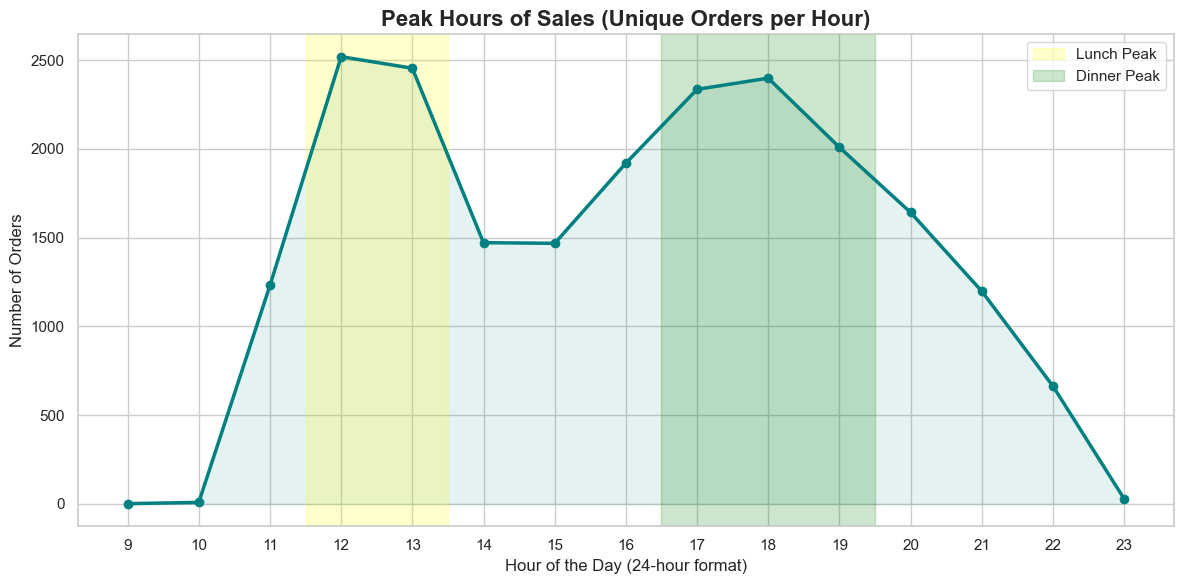

In [33]:
#Visualization of Peak Hours

#count unique orders per hour
hourly_orders = final_df.groupby('hour') ['order_id'].nunique()


#Creating a plot
plt.figure(figsize = (12, 6))
sns.set_theme(style='whitegrid')
plt.plot(hourly_orders.index, hourly_orders.values, marker = 'o', color = 'teal', linewidth = 2.5)
plt.fill_between(hourly_orders.index, hourly_orders.values, color ='teal', alpha = 0.1)

#Highlight Lunch and Dinner peaks
plt.axvspan(11.5, 13.5, color='yellow', alpha=0.2, label='Lunch Peak')
plt.axvspan(16.5, 19.5, color='green', alpha=0.2, label='Dinner Peak')


#Label and Title
plt.title('Peak Hours of Sales (Unique Orders per Hour)', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(int(hourly_orders.index.min()), int(hourly_orders.index.max()) +1))



plt.legend()
plt.tight_layout()
plt.show()

#### *The sales data analysis reveals that the business experiences two primary rush periods.*
#### *The busiest time of the day is between 12:00 PM and 1:00 PM.*
#### *The hour of 12:00 PM stands out as the single highest point of activity for the entire year, recording 2,520 unique orders.*

## 7. Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [34]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['total_price'] = final_df['price'] * final_df['quantity']
final_df['day_of_week'] = final_df['date'].dt.day_name()
sales_by_day = final_df.groupby('day_of_week') ['total_price'].sum()

In [35]:
sales_by_day

day_of_week
Friday       136073.90
Monday       107329.55
Saturday     123182.40
Sunday        99203.50
Thursday     123528.50
Tuesday      114133.80
Wednesday    114408.40
Name: total_price, dtype: float64

In [36]:
#To set the results in order

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(day_order)

In [37]:
print(sales_by_day)

day_of_week
Monday       107329.55
Tuesday      114133.80
Wednesday    114408.40
Thursday     123528.50
Friday       136073.90
Saturday     123182.40
Sunday        99203.50
Name: total_price, dtype: float64


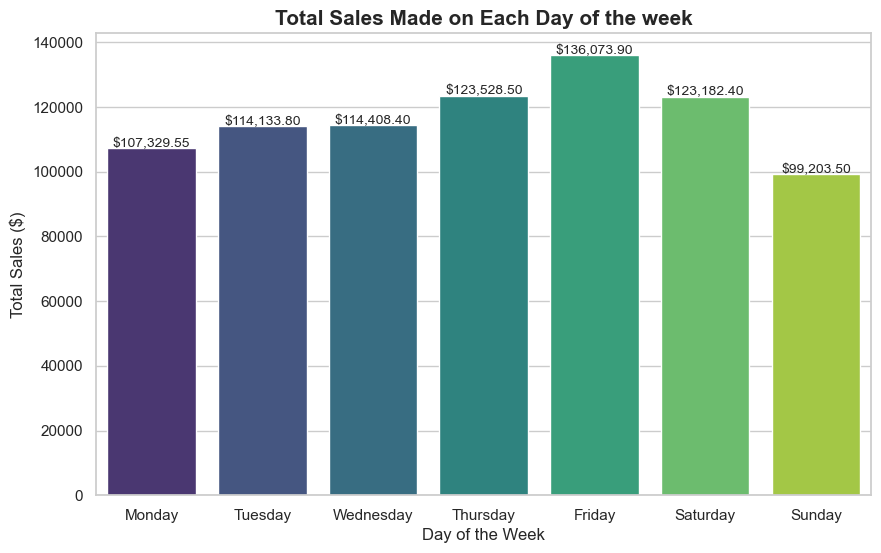

In [38]:
#Visualization of Sales by Day of Week

#creating a plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

#creating a bar chart
barplot = sns.barplot(x=sales_by_day.index, y=sales_by_day.values, hue=sales_by_day.index, palette='viridis', legend = False)

plt.title('Total Sales Made on Each Day of the week', fontsize = 15, fontweight = 'bold')
plt.xlabel('Day of the Week', fontsize = 12)
plt.ylabel('Total Sales ($)', fontsize = 12)

for j, val in enumerate(sales_by_day.values):
    plt.text(j,val + 500,f'${val:,.2f}',ha = 'center', fontsize=10)
plt.tight_layout
plt.show()


#### *The analysis of sales by the day of the week reveals a clear weekly cycle driven by customers habits and leisure patterns*
#### *Friday is the strongest day of the week, generating the highest total revenue of $136,073.90.*
#### *This is likely due to Pizza Friday tradition in offices and households, as well as the start of the weekends rush.*

## 8. Find the top 5 best selling pizzas.

In [39]:
top_5_selling_pizzas = final_df.groupby('name') ['quantity'].sum().sort_values(ascending = False).head(5)

In [40]:
top_5_selling_pizzas

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

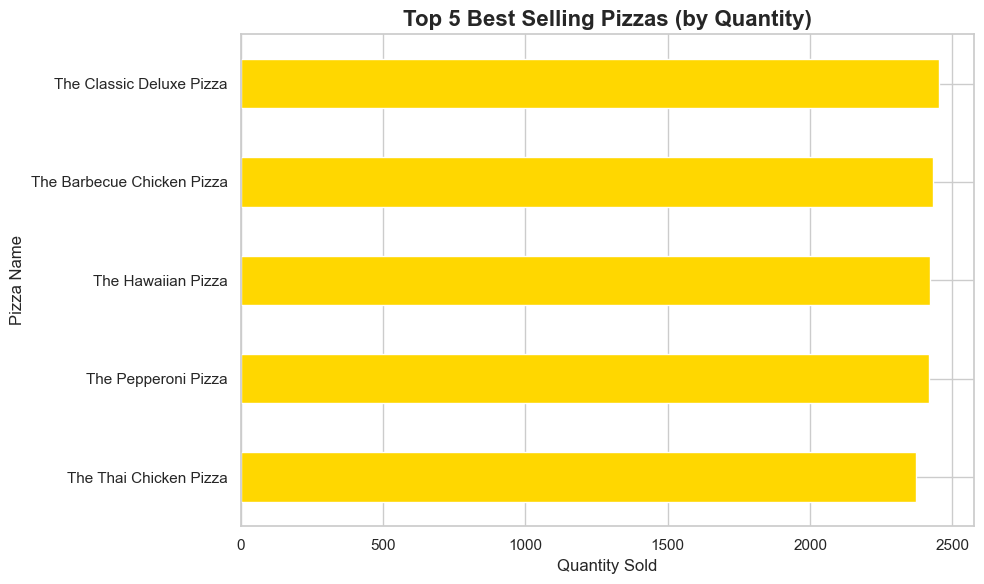

In [41]:
#visualization of top 5 best selling pizzas

#creating a plot
plt.figure(figsize=(10, 6))
top_5_selling_pizzas.sort_values().plot(kind='barh', color='gold')
plt.title('Top 5 Best Selling Pizzas (by Quantity)',fontsize=16,fontweight='bold')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.tight_layout()
plt.show()

#### *The analysis of the Top 5 Best selling Pizzas identifies the primary revenue drivers and customers favorites that dominates the menu.*
#### *The Classic Deluxe Pizza is the undisputed top seller, leading both in total quantity sold and overall popularity, Following closely are The Barbecue Chicken Pizza and The Hawaiian Pizza. Rounding out the top five are The Pepperoni Pizza and The Thai Chicken Pizza.*

## 9. Find the sales made in each month. Any trend noticable?

In [42]:
final_df['month'] = final_df['date'].dt.month_name()
sales_by_month = final_df.groupby('month') ['total_price'].sum()

In [43]:
sales_by_month

month
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: total_price, dtype: float64

In [44]:
#to set the result in order

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month = sales_by_month.reindex(month_order)

In [45]:
print(sales_by_month)

month
January      69793.30
February     65159.60
March        70397.10
April        68736.80
May          71402.75
June         68230.20
July         72557.90
August       68278.25
September    64180.05
October      64027.60
November     70395.35
December     64701.15
Name: total_price, dtype: float64


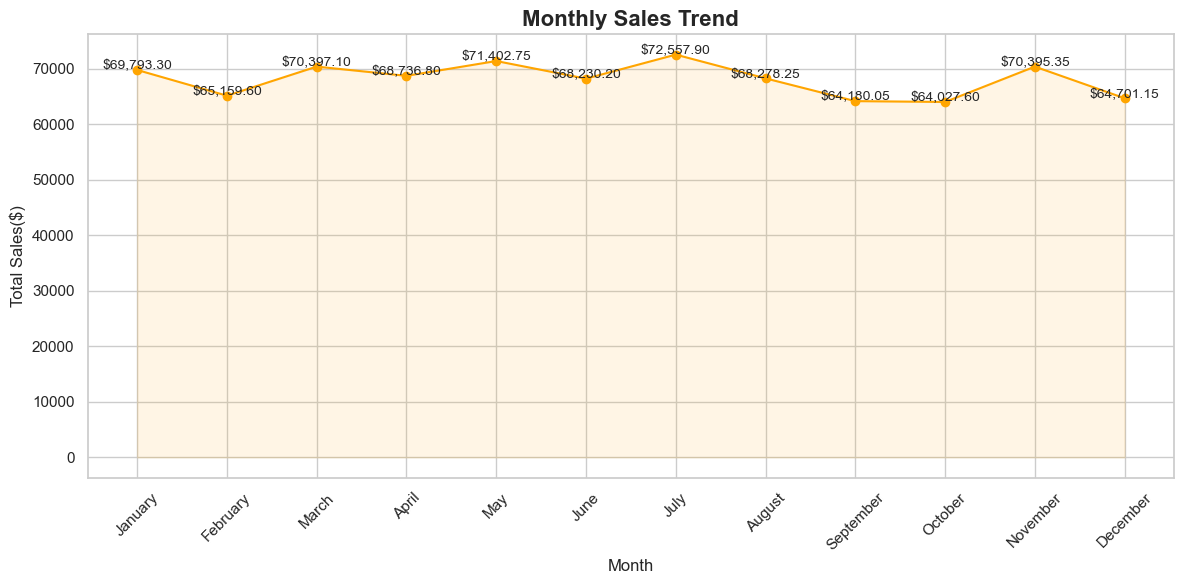

In [46]:
#Visualization of monthly sales

plt.figure(figsize=(12, 6))
sns.set_theme(style='whitegrid')
plt.plot(sales_by_month.index,sales_by_month.values,marker = 'o',linestyle='-', color = 'orange')
plt.fill_between(sales_by_month.index,sales_by_month.values, color='orange', alpha=0.1)
plt.title('Monthly Sales Trend',fontsize=16,fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales($)')
plt.xticks(rotation=45)
plt.grid(True)

for i, val in enumerate(sales_by_month.values):
    plt.text(i,val + 100,f'${val:,.2f}',ha = 'center', fontsize=10)
plt.tight_layout()
plt.show()

#### *The sales figures shows a relatively consistent performance throughout the year, with few notable trends.*
#### *Sales peak in July (72,557.90) and May (71,402.75). This suggest that the business performs best during the late spring and mid-summer periods.*
#### *The lowest sales were recorded in September and October, both dipping into the (64,000) range. This period represents the slow season for this pizza business, where revenue hits its annual floor.*

## 10. Are there pizza types that are not doing well on the menu?

In [47]:
bottom_5_pizzas = final_df.groupby('name') ['quantity'].sum().sort_values(ascending=True).head(5)

In [48]:
bottom_5_pizzas

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

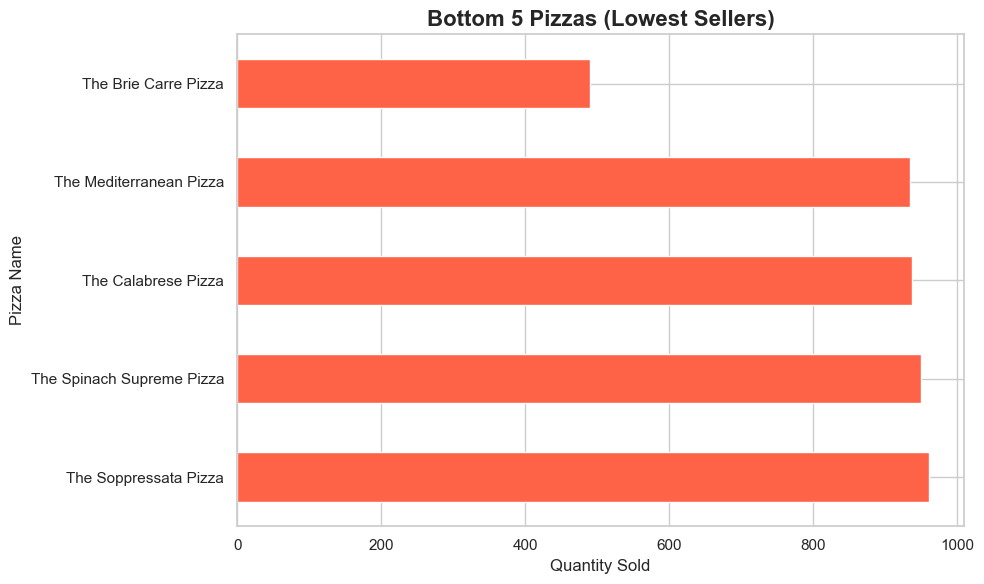

In [49]:
#visualization of bottom 5 best selling pizzas

#creating a plot
plt.figure(figsize = (10, 6))
bottom_5_pizzas.sort_values(ascending = False).plot(kind='barh', color = 'tomato')
plt.title('Bottom 5 Pizzas (Lowest Sellers)',fontsize=16,fontweight='bold')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.tight_layout()
plt.show()

#### *The analysis of the bottom 5 Pizzas highlists the menu items that have the least impact on total volume.The Brie Carre Pizza is the lowest performing item on the menu by a wide margin (only 490 sold). Other low performing pizzas include The Mediterranean (934 sold), The Calabrese (937 sold), The Spinach Supreme (950 sold) and The Soppressata (961 sold).*